# 🪙 Crypto Cleaning + EDA

This notebook cleans the CoinGecko dataset and performs exploratory data analysis (EDA).

- Step 1: Load raw data
- Step 2: Clean numeric + date columns
- Step 3: Save cleaned dataset
- Step 4: Run EDA (plots + summaries)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
# Load dataset
df = pd.read_csv("crypto_full_300.csv")
print(df.shape)
df.head()

(150, 15)


,symbol,name,image,current_price,market_cap,market_cap_rank,total_volume,circulating_supply,total_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date
0,btc,Bitcoin,https://coin-images.coingecko.com/coins/images...,103254.000000,2.053634e+12,1.0,1.098845e+11,1.994413e+07,1.994413e+07,126080.00,-18.61454,2025-10-06T18:57:42.558Z,67.810000,1.512231e+05,2013-07-06T00:00:00.000Z
1,eth,Ethereum,https://coin-images.coingecko.com/coins/images...,3350.040000,4.025845e+11,2.0,6.786860e+10,1.206973e+08,1.206973e+08,4946.05,-32.68115,2025-08-24T19:21:03.333Z,0.432979,7.689036e+05,2015-10-20T00:00:00.000Z
2,usdt,Tether,https://coin-images.coingecko.com/coins/images...,0.999982,1.834195e+11,3.0,1.959022e+11,1.834302e+11,1.834302e+11,1.32,-24.42810,2018-07-24T00:00:00.000Z,0.572521,7.464657e+01,2015-03-02T00:00:00.000Z
3,xrp,XRP,https://coin-images.coingecko.com/coins/images...,2.260000,1.356172e+11,4.0,8.760580e+09,6.010720e+10,9.998577e+10,3.65,-38.32373,2025-07-18T03:40:53.808Z,0.002686,8.362215e+04,2014-05-22T00:00:00.000Z
4,bnb,BNB,https://coin-images.coingecko.com/coins/images...,957.820000,1.315997e+11,5.0,4.882216e+09,1.377376e+08,1.377376e+08,1369.99,-30.53823,2025-10-13T08:41:24.131Z,0.039818,2.389843e+06,2017-10-19T00:00:00.000Z


In [3]:
# Cleaning numeric columns
num_cols = ["current_price","market_cap","market_cap_rank","total_volume",
            "circulating_supply","total_supply","ath","atl"]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce").round().astype("Int64")

# Parse dates
df["ath_date"] = pd.to_datetime(df["ath_date"], errors="coerce")
df["atl_date"] = pd.to_datetime(df["atl_date"], errors="coerce")

# Extract year/month
df["ath_year"] = df["ath_date"].dt.year
df["ath_month"] = df["ath_date"].dt.month
df["atl_year"] = df["atl_date"].dt.year
df["atl_month"] = df["atl_date"].dt.month

# Save cleaned dataset
df.to_csv("crypto_clean.csv", index=False)
print("Saved crypto_clean.csv")
df.head()

Saved crypto_clean.csv


,symbol,name,image,current_price,market_cap,market_cap_rank,total_volume,circulating_supply,total_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,ath_year,ath_month,atl_year,atl_month
0,btc,Bitcoin,https://coin-images.coingecko.com/coins/images...,103254,2053633927984,1,109884508023,19944128,19944128,126080,-18.61454,2025-10-06 18:57:42.558000+00:00,68,1.512231e+05,2013-07-06 00:00:00+00:00,2025,10,2013,7
1,eth,Ethereum,https://coin-images.coingecko.com/coins/images...,3350,402584535114,2,67868596754,120697275,120697275,4946,-32.68115,2025-08-24 19:21:03.333000+00:00,0,7.689036e+05,2015-10-20 00:00:00+00:00,2025,8,2015,10
2,usdt,Tether,https://coin-images.coingecko.com/coins/images...,1,183419490118,3,195902232727,183430228993,183430228993,1,-24.42810,2018-07-24 00:00:00+00:00,1,7.464657e+01,2015-03-02 00:00:00+00:00,2018,7,2015,3
3,xrp,XRP,https://coin-images.coingecko.com/coins/images...,2,135617205796,4,8760580279,60107199237,99985774127,4,-38.32373,2025-07-18 03:40:53.808000+00:00,0,8.362215e+04,2014-05-22 00:00:00+00:00,2025,7,2014,5
4,bnb,BNB,https://coin-images.coingecko.com/coins/images...,958,131599676955,5,4882216429,137737599,137737597,1370,-30.53823,2025-10-13 08:41:24.131000+00:00,0,2.389843e+06,2017-10-19 00:00:00+00:00,2025,10,2017,10


## 🔹 EDA


In [4]:
# Missing values
print(df.isna().sum())

symbol                   0
name                     0
image                    0
current_price            0
market_cap               0
market_cap_rank          0
total_volume             0
circulating_supply       0
total_supply             0
ath                      0
ath_change_percentage    0
ath_date                 0
atl                      0
atl_change_percentage    0
atl_date                 0
ath_year                 0
ath_month                0
atl_year                 0
atl_month                0
dtype: int64


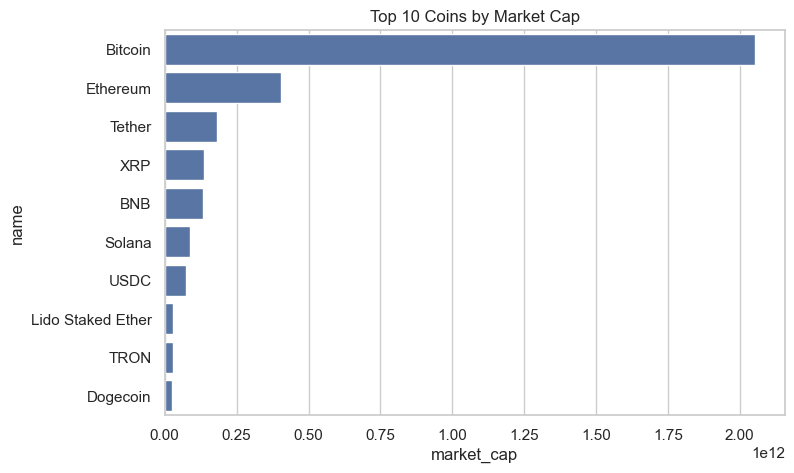

In [5]:
# Top 10 by market cap
top10 = df.nlargest(10, "market_cap")
plt.figure(figsize=(8,5))
sns.barplot(data=top10, x="market_cap", y="name")
plt.title("Top 10 Coins by Market Cap")
plt.show()

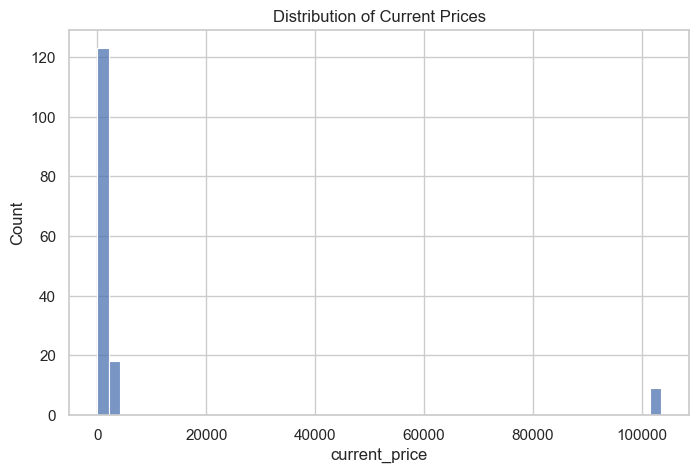

In [6]:
# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df["current_price"].dropna(), bins=50)
plt.title("Distribution of Current Prices")
plt.show()

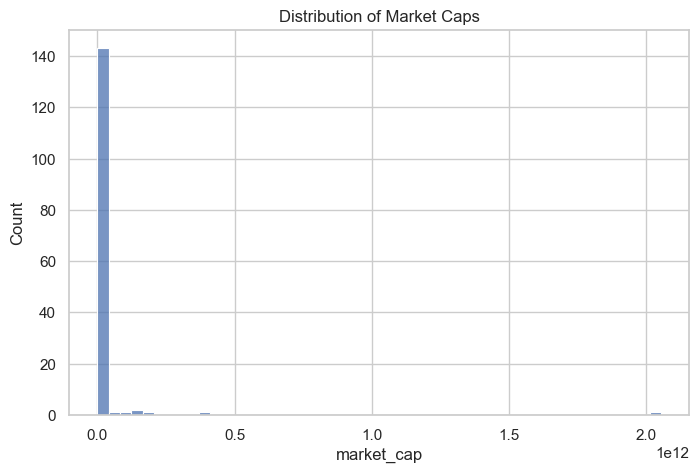

In [7]:
# Market cap distribution
plt.figure(figsize=(8,5))
sns.histplot(df["market_cap"].dropna(), bins=50)
plt.title("Distribution of Market Caps")
plt.show()

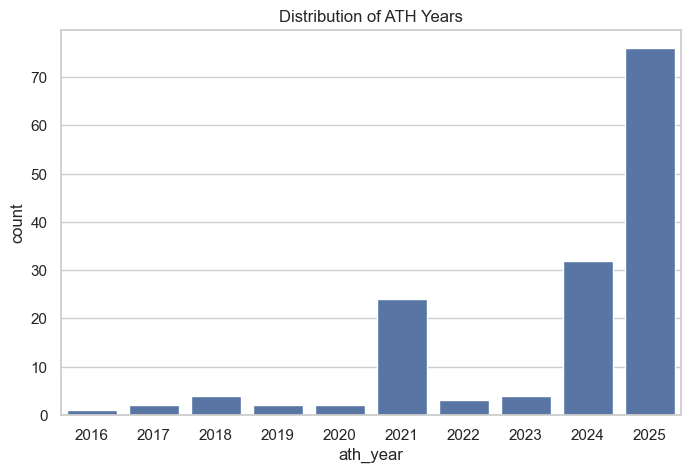

In [8]:
# ATH year distribution
plt.figure(figsize=(8,5))
sns.countplot(x="ath_year", data=df)
plt.title("Distribution of ATH Years")
plt.show()

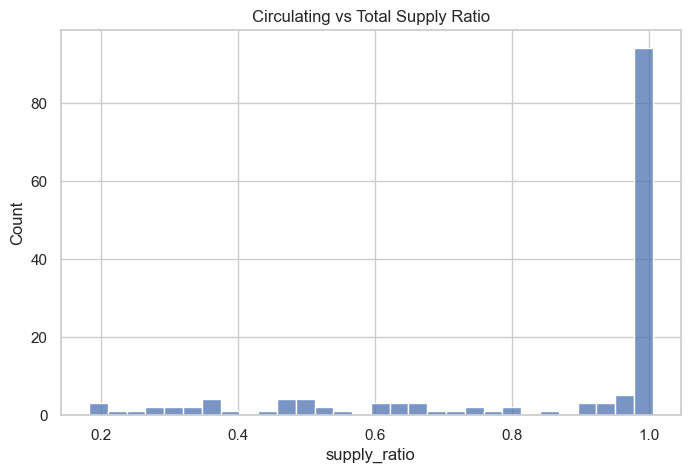

In [9]:
# Circulating vs Total Supply ratio
df["supply_ratio"] = df["circulating_supply"] / df["total_supply"]
plt.figure(figsize=(8,5))
sns.histplot(df["supply_ratio"].dropna(), bins=30)
plt.title("Circulating vs Total Supply Ratio")
plt.show()